# Basic CNN_Model_1



## 1. Importing and loading the preprocessed dataset

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step


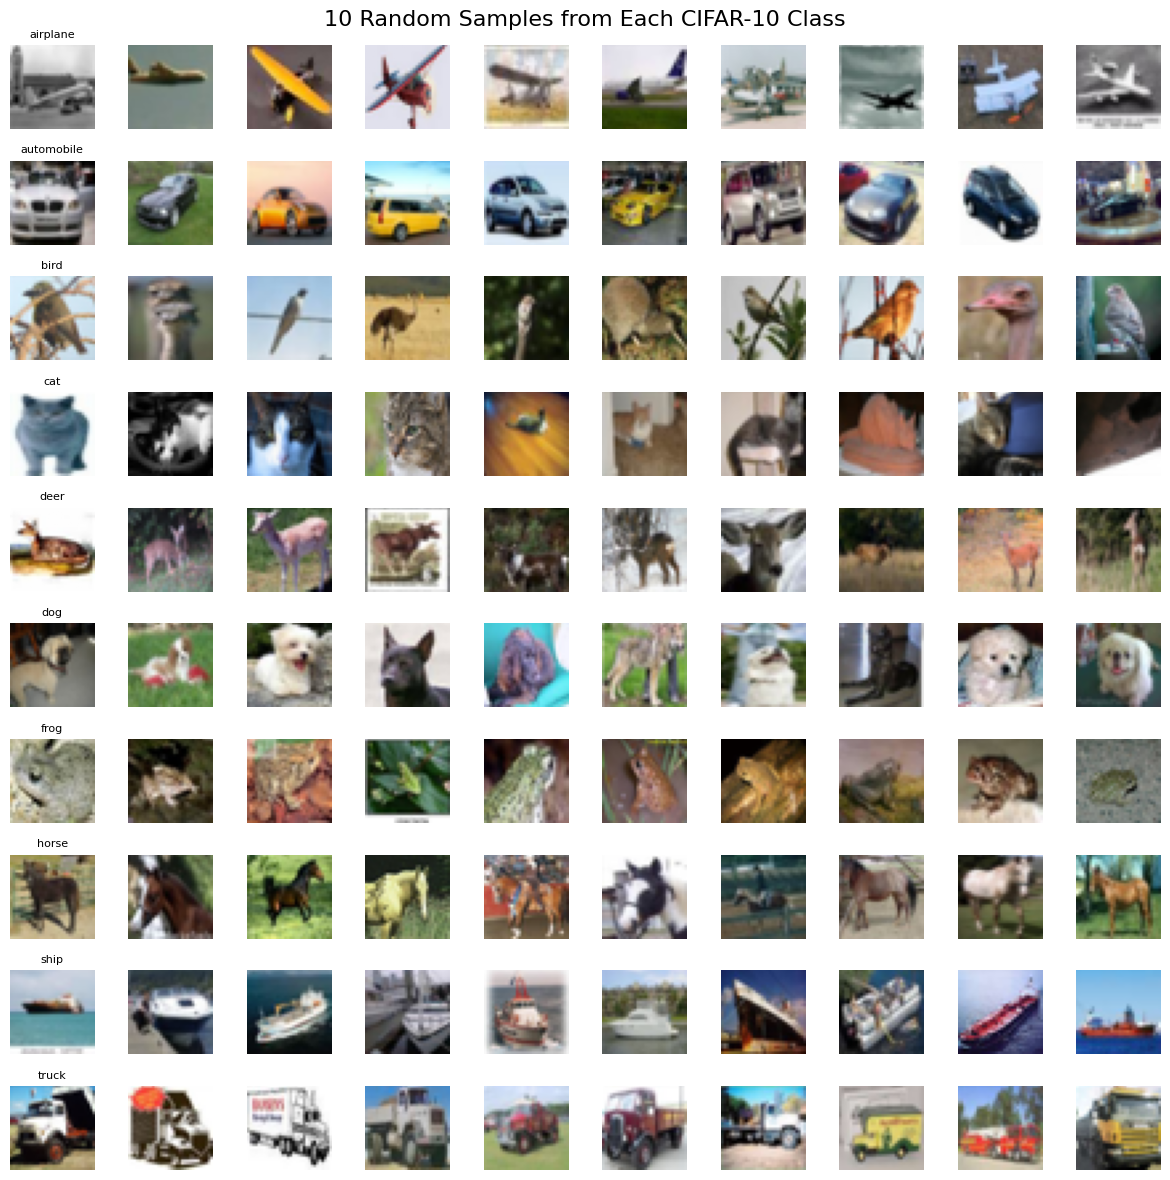

In [1]:
import nbformat
from IPython.core.interactiveshell import InteractiveShell

with open('preprocessing.ipynb') as f:
    nb = nbformat.read(f, as_version=4)

shell = InteractiveShell.instance()
for cell in nb.cells:
    if cell.cell_type == 'code':
        shell.run_cell(cell.source)

## 2. Model building

In [2]:
# First we will clear the keras session
from keras.backend import clear_session
clear_session()


#### 2.1 Defining callbacks to control overfitting

In [ ]:
# We will now try with some callbacks to prevent overfitting:
from tensorflow.keras.callbacks import EarlyStopping
callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
]

The callback, `EarlyStopping`, monitors the model's performance during training and stops the training process if the validation metric (by default, validation loss) does not improve for a specified number of epochs, set here by `patience=10`. This means if the model does not get better for 10 consecutive epochs, training will halt early, preventing unnecessary computation and reducing the risk of overfitting. The argument `restore_best_weights=True` ensures that after stopping, the model's weights are reverted to those from the epoch with the best validation performance, rather than the final epoch.

#### 2.2 Defining model architecture

The architecture consists of three convolutional layers, each followed by activation functions and pooling layers, with batch normalization applied after the first two convolutional layers. Batch normalization is included to stabilize and accelerate the training process by normalizing the output of the previous activation layer, which helps to reduce internal covariate shift. This normalization allows the model to use higher learning rates, improves convergence speed, and can also act as a form of regularization, reducing the risk of overfitting (which was quite high in our previous model). By incorporating batch normalization, we expect the model to become more robust and be able to achieve better performance during training and evaluation.

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, datasets

model = models.Sequential()

# Layer 1: Conv → BN → ReLU → MaxPool
model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Layer 2: Conv → BN → ReLU → MaxPool
model.add(layers.Conv2D(64, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Layer 3: Conv → ReLU → Dropout → MaxPool
model.add(layers.Conv2D(128, (3, 3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.25))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten before dense layers
model.add(layers.Flatten())

# Dense Layer
model.add(layers.Dense(128))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

# Output Layer
model.add(layers.Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 357,194 (1.36 MB)

 Trainable params: 357,002 (1.36 MB)

 Non-trainable params: 192 (768.00 B)

## 3. Model training

#### 3.1 Compiling the model

In [ ]:
#In this model, we've tried increasing the learning rate fro the Adam optimizer from 0.0001 to 0.001.

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


#### 3.2 Fitting the model to the training data

In [6]:
# Fitting the model, including the callbacks and increasing the epochs to 100:
history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=2
)

Epoch 1/100
704/704 - 14s - 21ms/step - accuracy: 0.3973 - loss: 1.6454 - val_accuracy: 0.5468 - val_loss: 1.3276
Epoch 2/100
704/704 - 3s - 5ms/step - accuracy: 0.5582 - loss: 1.2447 - val_accuracy: 0.5470 - val_loss: 1.2568
Epoch 3/100
704/704 - 4s - 5ms/step - accuracy: 0.6226 - loss: 1.0751 - val_accuracy: 0.4626 - val_loss: 1.5517
Epoch 4/100
704/704 - 5s - 7ms/step - accuracy: 0.6566 - loss: 0.9828 - val_accuracy: 0.6800 - val_loss: 0.9210
Epoch 5/100
704/704 - 6s - 9ms/step - accuracy: 0.6843 - loss: 0.9012 - val_accuracy: 0.6780 - val_loss: 0.9315
Epoch 6/100
704/704 - 4s - 6ms/step - accuracy: 0.7064 - loss: 0.8441 - val_accuracy: 0.6512 - val_loss: 0.9706
Epoch 7/100
704/704 - 5s - 7ms/step - accuracy: 0.7239 - loss: 0.7961 - val_accuracy: 0.7338 - val_loss: 0.7747
Epoch 8/100
704/704 - 3s - 5ms/step - accuracy: 0.7383 - loss: 0.7572 - val_accuracy: 0.7172 - val_loss: 0.8245
Epoch 9/100
704/704 - 3s - 4ms/step - accuracy: 0.7468 - loss: 0.7241 - val_accuracy: 0.6816 - val_los

#### 3.3 Plot training history (loss/accuracy curves)

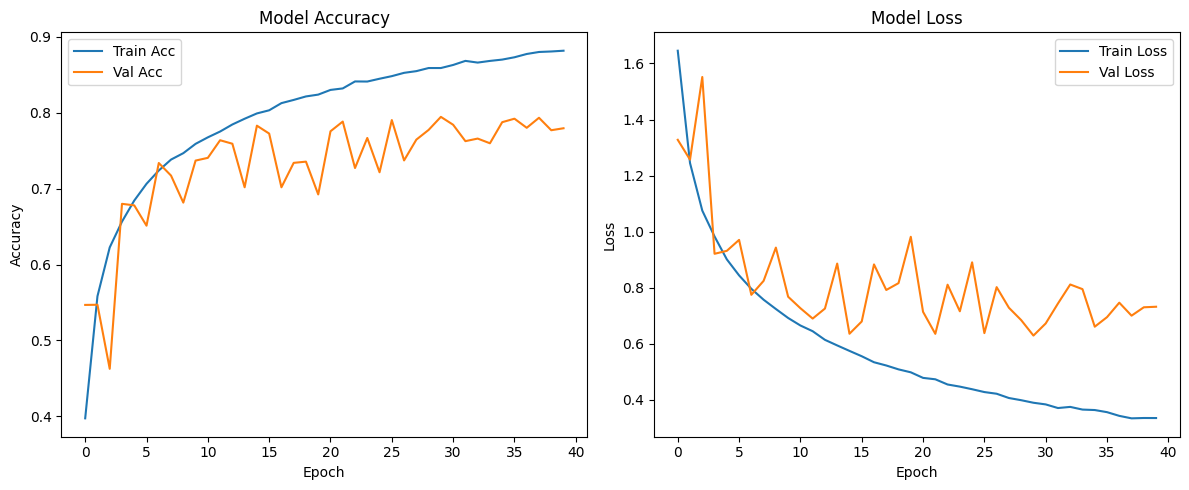

In [7]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## 4. Model evaluation

#### 4.1 Evaluate on the test set

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy: {test_acc:.4f}')
print(f'Test loss: {test_loss:.4f}')

Test accuracy: 0.7701
Test loss: 0.6817


#### 4.2 Calculate metrics: Precision, recall, F1 score

In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Get predictions from the model
y_pred = model.predict(x_test)

# Convert one-hot encoded labels and predictions to class indices
y_test_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate precision, recall, and F1 score, using 'macro' average, as the classes are balanced (6k images per class)
precision = precision_score(y_test_classes, y_pred_classes, average='macro')
recall = recall_score(y_test_classes, y_pred_classes, average='macro')
f1 = f1_score(y_test_classes, y_pred_classes, average='macro')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Precision: 0.7805
Recall: 0.7701
F1 Score: 0.7713


#### 4.3 Confusion matrix and classification report

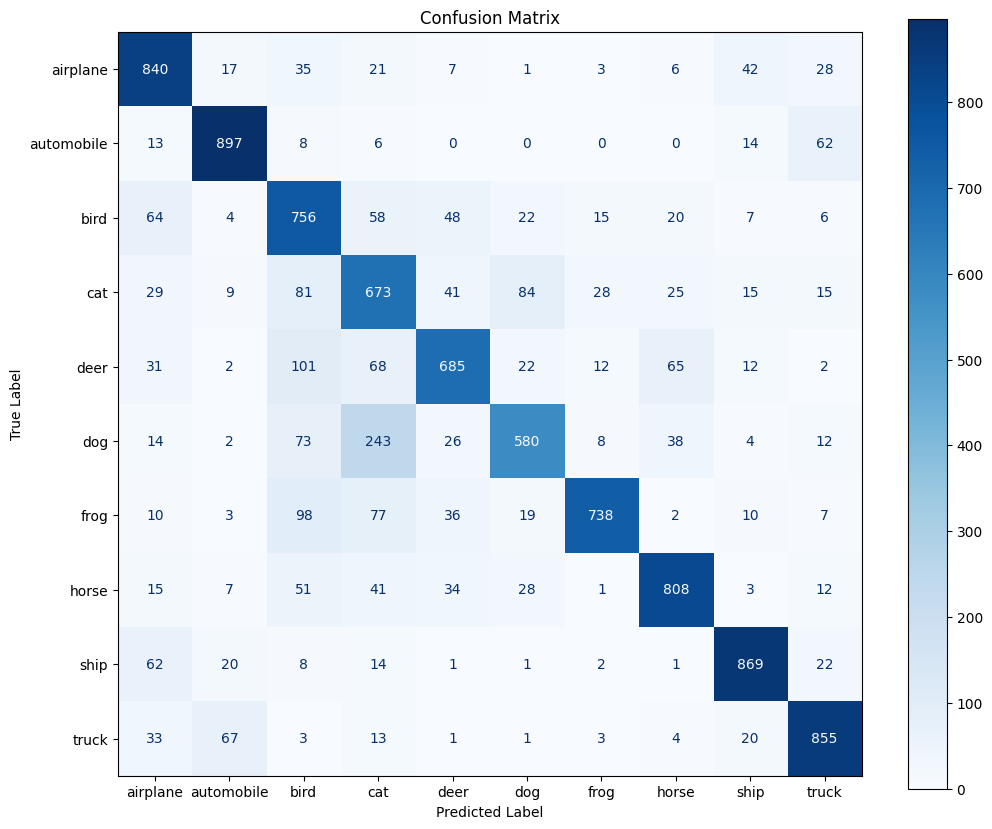

Classification Report:
              precision    recall  f1-score   support

    airplane       0.76      0.84      0.80      1000
  automobile       0.87      0.90      0.88      1000
        bird       0.62      0.76      0.68      1000
         cat       0.55      0.67      0.61      1000
        deer       0.78      0.69      0.73      1000
         dog       0.77      0.58      0.66      1000
        frog       0.91      0.74      0.82      1000
       horse       0.83      0.81      0.82      1000
        ship       0.87      0.87      0.87      1000
       truck       0.84      0.85      0.85      1000

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000



In [10]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Compute confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(12, 10))
disp.plot(cmap='Blues', ax=ax)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=class_names))

## 5. Results and conclusion

After some iterations, we've added some more layers and included measures (EarlyStop and Dropouts) to prevent overfitting. Thanks to this, we've achieved considerably better results than the previous model (Model_0). In this case, test accuracy has been of 0.7701 and a huge improvement in test loss, which now stands at 0.6817 (almost a 75% decrease!).
However, there is still some room for improvement. We're going to try modifying certain parameters and the architecture, to see if we are able to increase the model accuracy and decrease the test loss.